In [ ]:
!pip install -q xlrd
!git clone https://github.com/Lossophy/BINA-Projekt.git
!pip install panel --quiet
!pip install jupyter_bokeh

Cloning into 'BINA-Projekt'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 152 (delta 79), reused 34 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (152/152), 3.89 MiB | 6.25 MiB/s, done.
Resolving deltas: 100% (79/79), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfu

Vorbereitung der benötigten Bibliotheken

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display
import time
from IPython.display import display, clear_output
import panel as pn
pn.extension('plotly')

Import & Überprüfung der der Daten

In [ ]:
# Datei einlesen
df = pd.read_csv('/content/BINA-Projekt/Data/ogd115_gest_bilanz.csv')

# Daten überprüfen
print(df.head())


   Jahr           Rubrik Energietraeger        TJ
0  1980  Bruttoverbrauch   Elektrizität  -29450.0
1  1980  Bruttoverbrauch  Erdölprodukte  321250.0
2  1980  Bruttoverbrauch      Fernwärme       0.0
3  1980  Bruttoverbrauch            Gas   36280.0
4  1980  Bruttoverbrauch    Holzenergie   26280.0


**Beschreibung der Daten:**
Die Daten wurden von der  SFOE (Swiss Federal Office of Energy) heruntergeladen. Unter folgendem Link https://opendata.swiss/en/dataset/energiebilanz-der-schweiz/resource/1957ce24-bc06-40f8-a630-6db5bee3c419.


---
Der Datensatz hat die Spalten "Jahr", "Rubrik", "Energieträger" und "TJ".

Die Daten sind vom Jahr 1980 bis und mit 2023.

Es werden die folgenden Rubriken unterschieden:


*   Bruttoverbrauch =
*   Eigenverbrauch des Energiesektors, Netzverluste, Verbrauch der Speicherungen =
*   Endverbrauch - Dienstleistungen =
*   Endverbrauch - Haushalte =
*   Endverbrauch - Industrie =
*   Endverbrauch - Statistische Differenz inkl. Landwirtschaft =
*   Endverbrauch - Total =
*   Endverbrauch - Verkehr =
*   Energieumwandlung - Diverse Erneuerbare =
*   Energieumwandlung - Gaswerke =
*   Energieumwandlung - Kernkraftwerke =
*   Energieumwandlung - Raffinerien =
*   Energieumwandlung - Wasserkraftwerke
*   Energieumwandlung - konventionell-thermische Kraft-, Fernheiz- und Fernheizkraftwerke =
*   Export =
*   Import =
*   Inlandproduktion =
*   Lagerveränderung =
*   Nichtenergetischer Verbrauch =




1 Terajoule entspricht dabei 277'777,777 KWh. Zur besseren Einordnung kann die grösse der Energieeinheit mit folgendem Durchschnittswert dargestellt werden. Ein durchschnitts Haushalt mit 4 Personen in der Schweiz braucht ca. 4'500 KWh pro Jahr (https://www.energieheld.ch/renovation/nachhaltig-leben/energieverbrauch).

Als erstes möchten wir sehen, wie sich der allgemeine Verbrauch je Energieträger verändert hat.

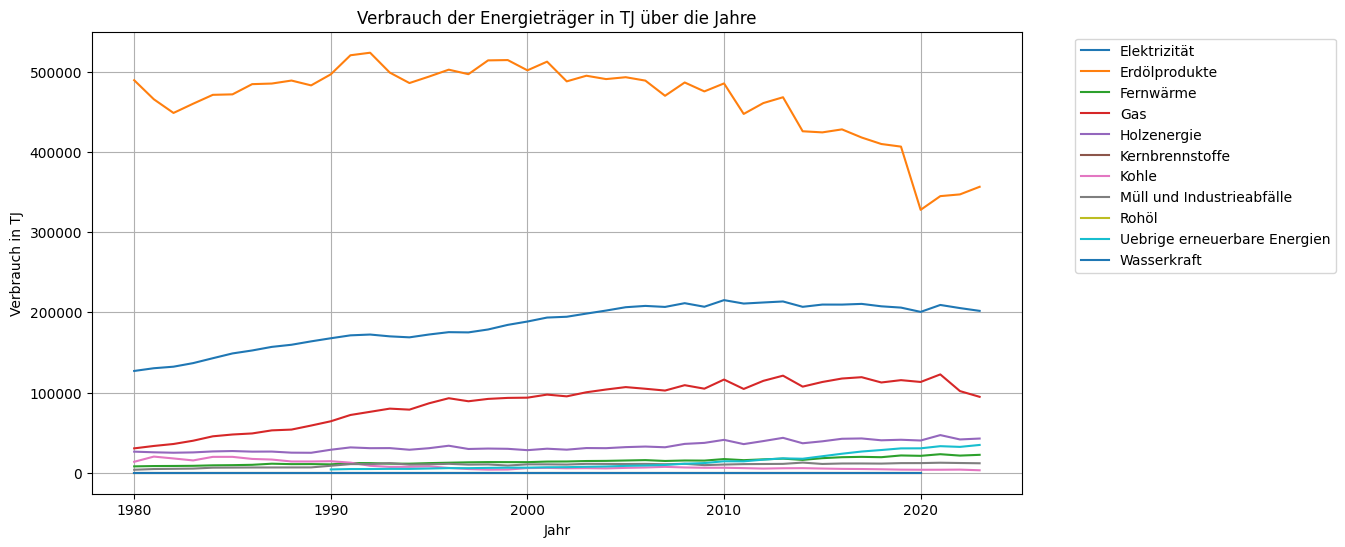

In [ ]:
df_filtered = df[
    (df['Energietraeger'].isin([
        'Elektrizität', 'Erdölprodukte', 'Fernwärme', 'Gas', 'Holzenergie',
        'Kernbrennstoffe', 'Kohle', 'Müll und Industrieabfälle',
        'Rohöl', 'Uebrige erneuerbare Energien', 'Wasserkraft'
    ])) &
    (df['Rubrik'] == 'Endverbrauch - Total')
]
df_pivot = df_filtered.pivot(index='Jahr', columns='Energietraeger', values='TJ')


# Plot erstellen
plt.figure(figsize=(12, 6))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], label=column)

plt.xlabel('Jahr')
plt.ylabel('Verbrauch in TJ')
plt.title('Verbrauch der Energieträger in TJ über die Jahre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


Um die Bedeutung zu bestimmen kann man die effektiven Zahlen anschauen oder auch die Enwicklung gegenüber dem vergangenen Jahr.

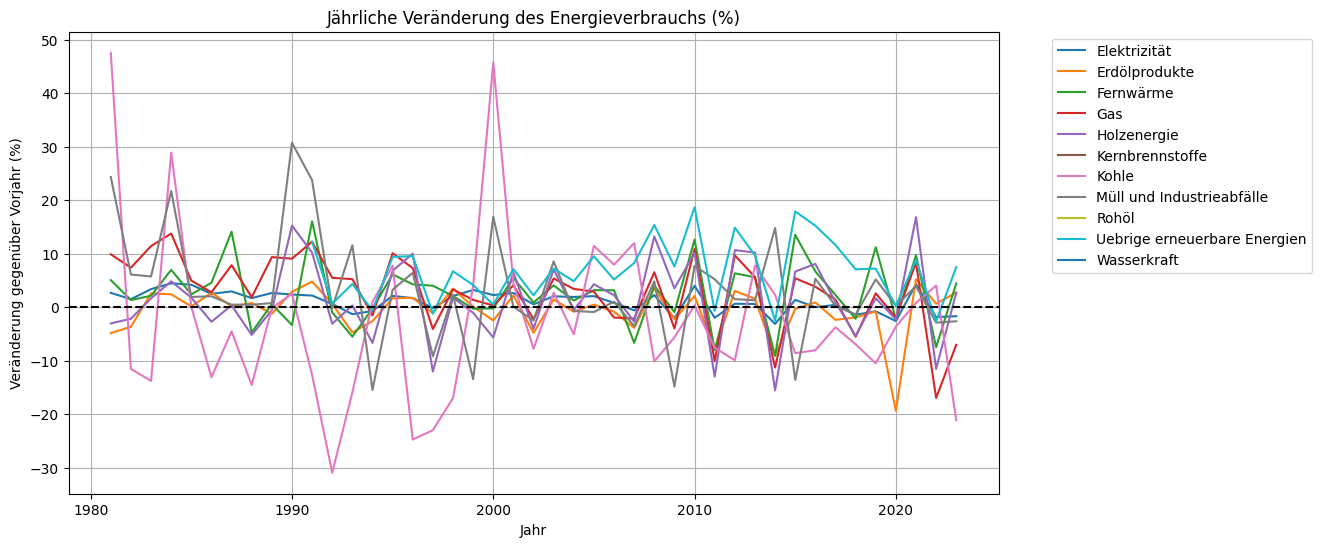

In [ ]:
# Veränderung vom Verbrauch über die Jahre
df_pct_change = df_pivot.pct_change() * 100


plt.figure(figsize=(12, 6))
for column in df_pct_change.columns:
    plt.plot(df_pct_change.index[1:], df_pct_change[column][1:], label=column) #Start vom zweiten Jahr

plt.xlabel('Jahr')
plt.ylabel('Veränderung gegenüber Vorjahr (%)')
plt.title('Jährliche Veränderung des Energieverbrauchs (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.show()


In [ ]:
# 1. Filterung (kombiniert)
df_filtered = df[
    (df['Energietraeger'].isin([
        'Elektrizität', 'Erdölprodukte', 'Fernwärme', 'Gas', 'Holzenergie',
        'Kernbrennstoffe', 'Kohle', 'Müll und Industrieabfälle',
        'Rohöl', 'Uebrige erneuerbare Energien', 'Wasserkraft'
    ])) &
    (df['Rubrik'] == 'Endverbrauch - Total')
]

# 2. Gruppieren und Pivot-Tabelle erstellen
df_grouped = df_filtered.groupby(['Jahr', 'Energietraeger'])['TJ'].sum().reset_index()
df_pivot = df_grouped.pivot(index='Jahr', columns='Energietraeger', values='TJ')

# 3. Fehlende Werte vorwärts auffüllen (z. B. bei einzelnen Energieträgern in bestimmten Jahren)
df_pivot = df_pivot.sort_index().ffill()

# 4. Prozentuale Veränderung berechnen
df_pct_change = df_pivot.pct_change() * 100
df_pct_change = df_pct_change.reset_index()  # Jahr wird zur Spalte

# 5. In Long-Format umwandeln für Plotly
df_long = df_pct_change.melt(id_vars='Jahr', var_name='Kategorie', value_name='Veränderung [%]')

# 6. Interaktiver Plotly-Plot
fig = px.line(
    df_long,
    x='Jahr',
    y='Veränderung [%]',
    color='Kategorie',
    title='Jährliche Veränderung des Energieverbrauchs (%)',
    markers=True
)

fig.add_hline(y=0, line_dash='dash', line_color='black')

fig.update_layout(
    xaxis_title='Jahr',
    yaxis_title='Veränderung gegenüber Vorjahr (%)',
    legend_title='Energieträger',
    hovermode='x unified'
)

fig.show()


Um einen besseren Überblick über die genauere Verteilung der Energieträger zu erhalten, wollen wir nun Pie-Charts pro Jahr anschauen.

In [ ]:
def plot_daten(jahr):
    gefiltert = df[(df['Jahr'] == jahr) & (df['Rubrik'] == 'Endverbrauch - Total')]

    if gefiltert.empty:
        print("Keine Daten für diese Kombination.")
        return

    energie_verbrauch = gefiltert.groupby('Energietraeger')['TJ'].sum()
    percentages = energie_verbrauch / energie_verbrauch.sum() * 100
    filtered_energie_verbrauch = energie_verbrauch[percentages >= 0.1]  # Es werden nur Daten mit bestimmter %-Angabe angezeigt

    # Spezifische Legende erstellt
    legend_labels = [f'{label}: {percentages[label]:.1f}%' for label in filtered_energie_verbrauch.index]

    plt.figure(figsize=(10, 6))
    wedges, texts, autotexts = plt.pie(filtered_energie_verbrauch, autopct='', startangle=90) # autopct ist leer und kann später ergänzt werden
    plt.title(f"Verbrauch der Energieträger im Jahr {jahr}")
    plt.axis('equal')
    plt.legend(wedges, legend_labels, title="Energieträger", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


    plt.show()

#Interaktive Ansicht verbinden
jahr_widget = widgets.IntSlider(min=df['Jahr'].min(), max=df['Jahr'].max(), step=1, description='Jahr:')
ui = widgets.VBox([jahr_widget])
out = widgets.interactive_output(plot_daten, {'jahr': jahr_widget,})

display(ui, out)

Output()

In [ ]:
# Darstellung anhand Kategorie Industrie, Haushalte etc.

# 1. Filterung (kombiniert)
df_filtered = df[
    (df['Energietraeger'].isin([
        'Elektrizität', 'Erdölprodukte', 'Fernwärme', 'Gas', 'Holzenergie',
        'Kernbrennstoffe', 'Kohle', 'Müll und Industrieabfälle',
        'Rohöl', 'Uebrige erneuerbare Energien', 'Wasserkraft'
    ])) &
    (df['Rubrik'].isin([
        'Endverbrauch - Dienstleistungen',
        'Endverbrauch - Haushalte', 'Endverbrauch - Industrie',
        'Endverbrauch - Statistische Differenz inkl. Landwirtschaft',
        'Endverbrauch - Verkehr']))
]

# Gruppieren und Pivot-Tabelle erstellen
df_grouped = df_filtered.groupby(['Jahr', 'Rubrik'])['TJ'].sum().reset_index()
df_pivot = df_grouped.pivot(index='Jahr', columns='Rubrik', values='TJ')
df_long = df_grouped.rename(columns={'Rubrik': 'Kategorie', 'TJ': 'Verbrauch [TJ]'})

# Interaktiver Plotly-Plot
fig = px.line(
    df_long,
    x='Jahr',
    y='Verbrauch [TJ]',
    color='Kategorie',
    title='Jährlicher Verbrauch',
    markers=True
)

fig.add_hline(y=0, line_dash='dash', line_color='black')

fig.update_layout(
    xaxis_title='Jahr',
    yaxis_title='Jährlicher Verbrauch',
    legend_title='Kategorie',
    hovermode='x unified'
)

fig.show()

Entwicklung der erneuerbaren Energieträger gegenüber dem Gesamtverbrauch.
Definiere, welche Energieträger als „erneuerbar“ gelten (z. B. Wasserkraft, Solar, Wind, Biomasse).

Berechne pro Jahr:

Gesamtverbrauch

Verbrauch durch erneuerbare Energien

Anteil = (erneuerbar / gesamt) × 100

In [ ]:
# Kategorisierung
energy_categories = {
    'Erdölprodukte': 'Fossil',
    'Gas': 'Fossil',
    'Holzenergie': 'Erneuerbar',
    'Kohle': 'Fossil',
    'Müll und Industrieabfälle': 'Erneuerbar',  # wird als erneuerbar betrachtet
    'Rohöl': 'Fossil',
    'Uebrige erneuerbare Energien': 'Erneuerbar',
    'Wasserkraft': 'Erneuerbar'
}

# Neue Spalte 'Kategorie'
df['Kategorie'] = df['Energietraeger'].map(energy_categories)

# Filtern auf Endverbrauch total und nur relevante Kategorien
df_filtered = df[
    (df['Kategorie'].isin(['Erneuerbar', 'Fossil'])) &
    (df['Rubrik'] == 'Endverbrauch - Total')
]

# Gruppieren nach Jahr und Kategorie (nicht Rubrik!)
df_grouped = df_filtered.groupby(['Jahr', 'Kategorie'])['TJ'].sum().reset_index()

# Umbenennen für Diagramm
df_grouped = df_grouped.rename(columns={'Kategorie': 'Energiekategorie', 'TJ': 'Verbrauch [TJ]'})

# Plotly-Diagramm
fig = px.line(
    df_grouped,
    x='Jahr',
    y='Verbrauch [TJ]',
    color='Energiekategorie',
    title='Jährlicher Bruttoendverbrauch nach Energiekategorie (Fossil vs. Erneuerbar)',
    markers=True
)

fig.update_layout(
    xaxis_title='Jahr',
    yaxis_title='Verbrauch [TJ]',
    legend_title='Energiekategorie',
    hovermode='x unified'
)

fig.add_hline(y=0, line_dash='dash', line_color='black')

fig.show()

In [ ]:
# 4. Kategorisierung Energieträger
energy_categories = {
    'Erdölprodukte': 'Fossil',
    'Gas': 'Fossil',
    'Holzenergie': 'Erneuerbar',
    'Kohle': 'Fossil',
    'Müll und Industrieabfälle': 'Erneuerbar',
    'Rohöl': 'Fossil',
    'Uebrige erneuerbare Energien': 'Erneuerbar',
    'Wasserkraft': 'Erneuerbar'
}
df['Kategorie'] = df['Energietraeger'].map(energy_categories)

# 5. Daten filtern
df_filtered = df[
    (df['Kategorie'].isin(['Erneuerbar', 'Fossil'])) &
    (df['Rubrik'] == 'Endverbrauch - Total')
]

# 6. Absoluter Verbrauch pro Jahr & Kategorie
df_grouped = df_filtered.groupby(['Jahr', 'Kategorie'])['TJ'].sum().reset_index()
df_grouped = df_grouped.rename(columns={'Kategorie': 'Energiekategorie', 'TJ': 'Verbrauch [TJ]'})

# 7. Prozentuale Anteile berechnen
df_percent = df_grouped.copy()
total_per_year = df_percent.groupby('Jahr')['Verbrauch [TJ]'].sum().reset_index()
total_per_year = total_per_year.rename(columns={'Verbrauch [TJ]': 'Total'})
df_percent = pd.merge(df_percent, total_per_year, on='Jahr')
df_percent['Anteil [%]'] = (df_percent['Verbrauch [TJ]'] / df_percent['Total']) * 100

# 8. Plotly-Diagramme
plot_abs = px.line(
    df_grouped,
    x='Jahr',
    y='Verbrauch [TJ]',
    color='Energiekategorie',
    title='Jährlicher Bruttoendverbrauch (TJ)',
    markers=True
)
plot_abs.update_layout(hovermode='x unified')

plot_rel = px.line(
    df_percent,
    x='Jahr',
    y='Anteil [%]',
    color='Energiekategorie',
    title='Anteil Fossil vs. Erneuerbar (%)',
    markers=True
)
plot_rel.update_layout(hovermode='x unified', yaxis=dict(range=[0, 100]))

# 9. Panel-Dashboard mit Tabs
dashboard = pn.Tabs(
    ('Absolute Werte', pn.pane.Plotly(plot_abs, config={'responsive': True}, sizing_mode='stretch_width')),
    ('Prozentuale Anteile', pn.pane.Plotly(plot_rel, config={'responsive': True}, sizing_mode='stretch_width'))
)

# 10. Anzeige im Output-Bereich von Colab
dashboard.servable()


Tabs
    [0] Plotly(Figure, config={'responsive': True}, sizing_mode='stretch_width')
    [1] Plotly(Figure, config={'responsive': True}, sizing_mode='stretch_width')

Wie haben sich die Verbrauchsmuster fossiler Energieträger in verschiedenen Kategorien (z. B. Industrie, Haushalte, Verkehr) verändert?


In [ ]:
# 1. Daten filtern: Endverbrauch - Haushalte & fossile Energieträger
df_haushalte_fossil = df[
    (df['Rubrik'] == 'Endverbrauch - Haushalte') &
    (df['Energietraeger'].isin(['Erdölprodukte', 'Gas', 'Kohle', 'Rohöl']))
].copy()

# 2. Gesamtverbrauch pro Jahr berechnen
df_total = df_haushalte_fossil.groupby('Jahr', as_index=False)['TJ'].sum()
df_total['Energietraeger'] = 'Gesamt'

# 3. Kombinieren der Energieträger mit dem Gesamtverbrauch
df_combined = pd.concat([df_haushalte_fossil, df_total], ignore_index=True)

# 4. Nur Zeilen mit tatsächlichem Verbrauch (> 0) behalten
df_combined = df_combined[df_combined['TJ'] > 0]

# 5. Sortieren nach Jahr und Verbrauch
df_combined = df_combined.sort_values(by=['Jahr', 'TJ'], ascending=[True, False])

# 6. Farben definieren (optional)
color_map = {
    'Erdölprodukte': '#1f77b4',
    'Gas': '#ff7f0e',
    'Kohle': '#2ca02c',
    'Rohöl': '#d62728',
    'Gesamt': '#888888'  # z. B. grau für Gesamt
}

# 7. Erstelle das Bar Race
fig = px.bar(
    df_combined,
    x="TJ",
    y="Energietraeger",
    animation_frame="Jahr",
    color="Energietraeger",
    color_discrete_map=color_map,
    hover_name="Energietraeger",
    range_x=[0, 305000], # Reichweite X-Achse
    title='Verbrauch fossiler Energieträger in Haushalten inkl. Gesamt (TJ)',
    orientation='h'
)

# 8. Layout-Anpassungen
fig.update_layout(
    xaxis_title="Verbrauch in TJ",
    yaxis_title="Energieträger",
    legend_title="Energieträger",
    plot_bgcolor='white',
    hovermode='closest',
    showlegend=False
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending')

# 9. Animation verlangsamen
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000  # Dauer pro Frame in ms
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 1000  # Übergangsdauer

# 10. Zeige das Diagramm
fig.show()

In [ ]:
# 1. Daten filtern: Endverbrauch - Dienstleistungen & fossile Energieträger
df_dienstleistungen_fossil = df[
    (df['Rubrik'] == 'Endverbrauch - Dienstleistungen') &
    (df['Energietraeger'].isin(['Erdölprodukte', 'Gas', 'Kohle', 'Rohöl']))
].copy()

# 2. Gesamtverbrauch pro Jahr berechnen
df_total = df_dienstleistungen_fossil.groupby('Jahr', as_index=False)['TJ'].sum()
df_total['Energietraeger'] = 'Gesamt'

# 3. Kombinieren der Energieträger mit dem Gesamtverbrauch
df_combined = pd.concat([df_dienstleistungen_fossil, df_total], ignore_index=True)

# 4. Nur Zeilen mit tatsächlichem Verbrauch (> 0) behalten
df_combined = df_combined[df_combined['TJ'] > 0]

# 5. Sortieren nach Jahr und Verbrauch
df_combined = df_combined.sort_values(by=['Jahr', 'TJ'], ascending=[True, False])

# 6. Farben definieren (optional)
color_map = {
    'Erdölprodukte': '#1f77b4',
    'Gas': '#ff7f0e',
    'Kohle': '#2ca02c',
    'Rohöl': '#d62728',
    'Gesamt': '#888888'  # z. B. grau für Gesamt
}

# 7. Erstelle das Bar Race
fig = px.bar(
    df_combined,
    x="TJ",
    y="Energietraeger",
    animation_frame="Jahr",
    color="Energietraeger",
    color_discrete_map=color_map,
    hover_name="Energietraeger",
    range_x=[0, 305000], # Reichweite X-Achse
    title='Verbrauch fossiler Energieträger von Dienstleistungsbetrieben inkl. Gesamt (TJ)',
    orientation='h'
)

# 8. Layout-Anpassungen
fig.update_layout(
    xaxis_title="Verbrauch in TJ",
    yaxis_title="Energieträger",
    legend_title="Energieträger",
    plot_bgcolor='white',
    hovermode='closest',
    showlegend=False
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending')

# 9. Animation verlangsamen
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000  # Dauer pro Frame in ms
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 1000  # Übergangsdauer

# 10. Zeige das Diagramm
fig.show()

In [ ]:
# 1. Daten filtern: Endverbrauch - Industrie & fossile Energieträger
df_industrie_fossil = df[
    (df['Rubrik'] == 'Endverbrauch - Industrie') &
    (df['Energietraeger'].isin(['Erdölprodukte', 'Gas', 'Kohle', 'Rohöl']))
].copy()

# 2. Gesamtverbrauch pro Jahr berechnen
df_total = df_industrie_fossil.groupby('Jahr', as_index=False)['TJ'].sum()
df_total['Energietraeger'] = 'Gesamt'

# 3. Kombinieren der Energieträger mit dem Gesamtverbrauch
df_combined = pd.concat([df_industrie_fossil, df_total], ignore_index=True)

# 4. Nur Zeilen mit tatsächlichem Verbrauch (> 0) behalten
df_combined = df_combined[df_combined['TJ'] > 0]

# 5. Sortieren nach Jahr und Verbrauch
df_combined = df_combined.sort_values(by=['Jahr', 'TJ'], ascending=[True, False])

# 6. Farben definieren (optional)
color_map = {
    'Erdölprodukte': '#1f77b4',
    'Gas': '#ff7f0e',
    'Kohle': '#2ca02c',
    'Rohöl': '#d62728',
    'Gesamt': '#888888'  # z. B. grau für Gesamt
}

# 7. Erstelle das Bar Race
fig = px.bar(
    df_combined,
    x="TJ",
    y="Energietraeger",
    animation_frame="Jahr",
    color="Energietraeger",
    color_discrete_map=color_map,
    hover_name="Energietraeger",
    range_x=[0, 305000], # Reichweite X-Achse
    title='Verbrauch fossiler Energieträger der Industrie inkl. Gesamt (TJ)',
    orientation='h'
)

# 8. Layout-Anpassungen
fig.update_layout(
    xaxis_title="Verbrauch in TJ",
    yaxis_title="Energieträger",
    legend_title="Energieträger",
    plot_bgcolor='white',
    hovermode='closest',
    showlegend=False
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending')

# 9. Animation verlangsamen
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000  # Dauer pro Frame in ms
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 1000  # Übergangsdauer

# 10. Zeige das Diagramm
fig.show()

Es muss noch Endverbrauch - Verkehr erstellt werden.

In [ ]:
# 1. Daten filtern: Endverbrauch - Verkehr & fossile Energieträger
df_differenz_fossil = df[
    (df['Rubrik'] == 'Endverbrauch - Verkehr') &
    (df['Energietraeger'].isin(['Erdölprodukte', 'Gas', 'Kohle', 'Rohöl']))
].copy()

# 2. Gesamtverbrauch pro Jahr berechnen
df_total = df_differenz_fossil.groupby('Jahr', as_index=False)['TJ'].sum()
df_total['Energietraeger'] = 'Gesamt'

# 3. Kombinieren der Energieträger mit dem Gesamtverbrauch
df_combined = pd.concat([df_differenz_fossil, df_total], ignore_index=True)

# 4. Nur Zeilen mit tatsächlichem Verbrauch (> 0) behalten
df_combined = df_combined[df_combined['TJ'] > 0]

# 5. Sortieren nach Jahr und Verbrauch
df_combined = df_combined.sort_values(by=['Jahr', 'TJ'], ascending=[True, False])

# 6. Farben definieren (optional)
color_map = {
    'Erdölprodukte': '#1f77b4',
    'Gas': '#ff7f0e',
    'Kohle': '#2ca02c',
    'Rohöl': '#d62728',
    'Gesamt': '#888888'  # z. B. grau für Gesamt
}

# 7. Erstelle das Bar Race
fig = px.bar(
    df_combined,
    x="TJ",
    y="Energietraeger",
    animation_frame="Jahr",
    color="Energietraeger",
    color_discrete_map=color_map,
    hover_name="Energietraeger",
    range_x=[0, 305000], # Reichweite X-Achse
    title='Verbrauch fossiler Energieträger im Verkehr inkl. Gesamt (TJ)',
    orientation='h'
)

# 8. Layout-Anpassungen
fig.update_layout(
    xaxis_title="Verbrauch in TJ",
    yaxis_title="Energieträger",
    legend_title="Energieträger",
    plot_bgcolor='white',
    hovermode='closest',
    showlegend=False
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending')

# 9. Animation verlangsamen
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000  # Dauer pro Frame in ms
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 1000  # Übergangsdauer

# 10. Zeige das Diagramm
fig.show()

In [ ]:
# 1. Daten filtern: Endverbrauch - Statistische Differenz inkl. Landwirtschaft & fossile Energieträger
df_differenz_fossil = df[
    (df['Rubrik'] == 'Endverbrauch - Statistische Differenz inkl. Landwirtschaft') &
    (df['Energietraeger'].isin(['Erdölprodukte', 'Gas', 'Kohle', 'Rohöl']))
].copy()

# 2. Gesamtverbrauch pro Jahr berechnen
df_total = df_differenz_fossil.groupby('Jahr', as_index=False)['TJ'].sum()
df_total['Energietraeger'] = 'Gesamt'

# 3. Kombinieren der Energieträger mit dem Gesamtverbrauch
df_combined = pd.concat([df_differenz_fossil, df_total], ignore_index=True)

# 4. Nur Zeilen mit tatsächlichem Verbrauch (> 0) behalten
df_combined = df_combined[df_combined['TJ'] > 0]

# 5. Sortieren nach Jahr und Verbrauch
df_combined = df_combined.sort_values(by=['Jahr', 'TJ'], ascending=[True, False])

# 6. Farben definieren (optional)
color_map = {
    'Erdölprodukte': '#1f77b4',
    'Gas': '#ff7f0e',
    'Kohle': '#2ca02c',
    'Rohöl': '#d62728',
    'Gesamt': '#888888'  # z. B. grau für Gesamt
}

# 7. Erstelle das Bar Race
fig = px.bar(
    df_combined,
    x="TJ",
    y="Energietraeger",
    animation_frame="Jahr",
    color="Energietraeger",
    color_discrete_map=color_map,
    hover_name="Energietraeger",
    range_x=[0, 305000], # Reichweite X-Achse
    title='Verbrauch fossiler Energieträger Statistische Differenz (inkl. Landwirtschaft) inkl. Gesamt (TJ)',
    orientation='h'
)

# 8. Layout-Anpassungen
fig.update_layout(
    xaxis_title="Verbrauch in TJ",
    yaxis_title="Energieträger",
    legend_title="Energieträger",
    plot_bgcolor='white',
    hovermode='closest',
    showlegend=False
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending')

# 9. Animation verlangsamen
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000  # Dauer pro Frame in ms
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 1000  # Übergangsdauer

# 10. Zeige das Diagramm
fig.show()

In [ ]:
# 1. Rubriken und fossile Energieträger definieren
rubriken = [
    'Endverbrauch - Haushalte',
    'Endverbrauch - Dienstleistungen',
    'Endverbrauch - Industrie',
    'Endverbrauch - Statistische Differenz inkl. Landwirtschaft',
    'Endverbrauch - Verkehr'
]
fossil = ['Erdölprodukte', 'Gas', 'Kohle', 'Rohöl']

# 2. Filtern nach relevanten Rubriken und fossilen Energieträgern
df_fossil_rubriken = df[
    (df['Rubrik'].isin(rubriken)) &
    (df['Energietraeger'].isin(fossil))
].copy()

# 3. Gruppieren: Gesamtverbrauch fossiler Energieträger je Jahr & Rubrik
df_summe = df_fossil_rubriken.groupby(['Jahr', 'Rubrik'], as_index=False)['TJ'].sum()

# 3b. Rubriken umbenennen für bessere Lesbarkeit
rubrik_mapping = {
    'Endverbrauch - Haushalte': 'Haushalte',
    'Endverbrauch - Dienstleistungen': 'Dienstleistungen',
    'Endverbrauch - Industrie': 'Industrie',
    'Endverbrauch - Statistische Differenz inkl. Landwirtschaft': 'Differenz + Landwirtschaft',
    'Endverbrauch - Verkehr': 'Verkehr'
}
df_summe['Rubrik'] = df_summe['Rubrik'].replace(rubrik_mapping)

# 4. Nur Jahre mit Verbrauch > 0 behalten
df_summe = df_summe[df_summe['TJ'] > 0]

# 5. Sortieren für Darstellung
df_summe = df_summe.sort_values(by=['Jahr', 'TJ'], ascending=[True, False])

# 6. Farben definieren (optional)
color_map = {
    'Haushalte': '#1f77b4',
    'Dienstleistungen': '#ff7f0e',
    'Industrie': '#2ca02c',
    'Statistische Differenz + Landwirtschaft': '#d62728',
    'Verkehr': '#9467bd'
}

# 7. Bar Race erstellen
fig = px.bar(
    df_summe,
    x="TJ",
    y="Rubrik",
    animation_frame="Jahr",
    color="Rubrik",
    color_discrete_map=color_map,
    hover_name="Rubrik",
    range_x=[0, 305000],  # fixe X-Achsen-Grenze
    title='Gesamtverbrauch fossiler Energieträger nach Rubrik (TJ)',
    orientation='h'
)

# 8. Layout-Anpassungen
fig.update_layout(
    xaxis_title="Verbrauch in TJ",
    yaxis_title="Rubrik",
    legend_title="Rubrik",
    plot_bgcolor='white',
    hovermode='closest',
    showlegend=False
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending')

# 9. Animation verlangsamen
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 2000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 1000

# 10. Anzeigen
fig.show()


Die Auswertung anhand Linien-Diagramm

In [ ]:
# 1. Kategorisierung Energieträger
energy_categories = {
    'Erdölprodukte': 'Fossil',
    'Gas': 'Fossil',
    'Holzenergie': 'Erneuerbar',
    'Kohle': 'Fossil',
    'Müll und Industrieabfälle': 'Erneuerbar',
    'Rohöl': 'Fossil',
    'Uebrige erneuerbare Energien': 'Erneuerbar',
    'Wasserkraft': 'Erneuerbar'
}
df['Kategorie'] = df['Energietraeger'].map(energy_categories)

# 2. Rubriken umbenennen
rubrik_mapping = {
    'Endverbrauch - Haushalte': 'Haushalte',
    'Endverbrauch - Dienstleistungen': 'Dienstleistungen',
    'Endverbrauch - Industrie': 'Industrie',
    'Endverbrauch - Statistische Differenz inkl. Landwirtschaft': 'Differenz + Landwirtschaft',
    'Endverbrauch - Verkehr': 'Verkehr'
}
df['Rubrik_vereinfacht'] = df['Rubrik'].map(rubrik_mapping)

# 3. Daten filtern
df_filtered = df[
    df['Rubrik_vereinfacht'].notna() &
    df['Kategorie'].isin(['Fossil', 'Erneuerbar'])
]

# 4. Gruppierung: Verbrauch pro Jahr & Rubrik
df_grouped = df_filtered.groupby(['Jahr', 'Rubrik_vereinfacht'])['TJ'].sum().reset_index()
df_grouped = df_grouped.rename(columns={'Rubrik_vereinfacht': 'Sektor', 'TJ': 'Verbrauch [TJ]'})

# 5. Prozentuale Anteile berechnen
df_percent = df_grouped.copy()
total_per_year = df_percent.groupby('Jahr')['Verbrauch [TJ]'].sum().reset_index()
total_per_year = total_per_year.rename(columns={'Verbrauch [TJ]': 'Total'})
df_percent = pd.merge(df_percent, total_per_year, on='Jahr')
df_percent['Anteil [%]'] = (df_percent['Verbrauch [TJ]'] / df_percent['Total']) * 100

# 6. Reihenfolge der Legende definieren
sektor_order = ['Verkehr', 'Haushalte', 'Industrie', 'Dienstleistungen', 'Differenz + Landwirtschaft']
df_grouped['Sektor'] = pd.Categorical(df_grouped['Sektor'], categories=sektor_order, ordered=True)
df_percent['Sektor'] = pd.Categorical(df_percent['Sektor'], categories=sektor_order, ordered=True)

# 7. Plotly-Diagramme mit sortierter Legende
plot_abs = px.line(
    df_grouped,
    x='Jahr',
    y='Verbrauch [TJ]',
    color='Sektor',
    category_orders={'Sektor': sektor_order},
    title='Jährlicher fossiler Bruttoendverbrauch nach Sektor (TJ)',
    markers=True
)
plot_abs.update_layout(hovermode='x unified')

plot_rel = px.line(
    df_percent,
    x='Jahr',
    y='Anteil [%]',
    color='Sektor',
    category_orders={'Sektor': sektor_order},
    title='Prozentuale Verteilung des Endverbrauchs nach Sektor (%)',
    markers=True
)
plot_rel.update_layout(hovermode='x unified', yaxis=dict(range=[0, 100]))

# 8. Panel-Dashboard mit Tabs
dashboard = pn.Tabs(
    ('Absolute Werte', pn.pane.Plotly(plot_abs, config={'responsive': True}, sizing_mode='stretch_width')),
    ('Prozentuale Anteile', pn.pane.Plotly(plot_rel, config={'responsive': True}, sizing_mode='stretch_width'))
)

# 9. Anzeige im Output-Bereich von Colab
dashboard.servable()


Tabs
    [0] Plotly(Figure, config={'responsive': True}, sizing_mode='stretch_width')
    [1] Plotly(Figure, config={'responsive': True}, sizing_mode='stretch_width')

In [45]:

# 1. Kategorisierung Energieträger
energy_categories = {
    'Erdölprodukte': 'Fossil',
    'Gas': 'Fossil',
    'Holzenergie': 'Erneuerbar',
    'Kohle': 'Fossil',
    'Müll und Industrieabfälle': 'Erneuerbar',
    'Rohöl': 'Fossil',
    'Uebrige erneuerbare Energien': 'Erneuerbar',
    'Wasserkraft': 'Erneuerbar'
}
df['Kategorie'] = df['Energietraeger'].map(energy_categories)

# 2. Rubriken umbenennen
rubrik_mapping = {
    'Endverbrauch - Haushalte': 'Haushalte',
    'Endverbrauch - Dienstleistungen': 'Dienstleistungen',
    'Endverbrauch - Industrie': 'Industrie',
    'Endverbrauch - Statistische Differenz inkl. Landwirtschaft': 'Differenz + Landwirtschaft',
    'Endverbrauch - Verkehr': 'Verkehr'
}
df['Rubrik_vereinfacht'] = df['Rubrik'].map(rubrik_mapping)

# 3. Daten filtern
df_filtered = df[
    df['Rubrik_vereinfacht'].notna() &
    df['Kategorie'].isin(['Fossil', 'Erneuerbar'])
]

# 4. Gruppierung: Verbrauch pro Jahr & Rubrik
df_grouped = df_filtered.groupby(['Jahr', 'Rubrik_vereinfacht'])['TJ'].sum().reset_index()
df_grouped = df_grouped.rename(columns={'Rubrik_vereinfacht': 'Sektor', 'TJ': 'Verbrauch [TJ]'})

# 5. Prozentuale Anteile berechnen
df_percent = df_grouped.copy()
total_per_year = df_percent.groupby('Jahr')['Verbrauch [TJ]'].sum().reset_index()
total_per_year = total_per_year.rename(columns={'Verbrauch [TJ]': 'Total'})
df_percent = pd.merge(df_percent, total_per_year, on='Jahr')
df_percent['Anteil [%]'] = (df_percent['Verbrauch [TJ]'] / df_percent['Total']) * 100

# 6. Reihenfolge der Legende definieren
sektor_order = ['Verkehr', 'Haushalte', 'Industrie', 'Dienstleistungen', 'Differenz + Landwirtschaft']
df_grouped['Sektor'] = pd.Categorical(df_grouped['Sektor'], categories=sektor_order, ordered=True)
df_percent['Sektor'] = pd.Categorical(df_percent['Sektor'], categories=sektor_order, ordered=True)

# 7. Einwohnerzahlen der Schweiz (1980–2023, gerundet)
einwohner_df = pd.DataFrame({
    'Jahr': list(range(1980, 2024)),
    'Einwohner': [
        6335, 6370, 6410, 6420, 6450, 6480, 6520, 6550, 6580, 6620,
        6690, 6760, 6830, 6890, 6950, 7020, 7080, 7130, 7180, 7200,
        7200, 7260, 7300, 7330, 7360, 7410, 7510, 7590, 7700, 7780,
        7870, 7950, 8040, 8140, 8230, 8330, 8400, 8450, 8540, 8610,
        8670, 8740, 8770, 8960,
    ]
})

# 8. Plot: Einwohnerzahlen
plot_einwohner = px.line(
    einwohner_df,
    x='Jahr',
    y='Einwohner',
    title='Einwohnerzahl der Schweiz pro Jahr (in 1000)',
    markers=True
)
plot_einwohner.update_layout(hovermode='x unified')

# 9. Pro-Kopf-Verbrauch nach Sektor
df_pro_kopf = df_grouped.merge(einwohner_df, on='Jahr', how='left')
df_pro_kopf['Verbrauch [GJ/Kopf]'] = (df_pro_kopf['Verbrauch [TJ]'] * 1000) / (df_pro_kopf['Einwohner'] * 1000)

plot_pro_kopf = px.line(
    df_pro_kopf,
    x='Jahr',
    y='Verbrauch [GJ/Kopf]',
    color='Sektor',
    category_orders={'Sektor': sektor_order},
    title='Fossiler Endenergieverbrauch pro Kopf nach Sektor (GJ)',
    markers=True
)
plot_pro_kopf.update_layout(hovermode='x unified')

# 10. Totaler fossiler Pro-Kopf-Verbrauch (alle Sektoren)
df_total_fossil = df_filtered[df_filtered['Kategorie'] == 'Fossil']
df_total_fossil = df_total_fossil.groupby('Jahr')['TJ'].sum().reset_index()
df_total_fossil = df_total_fossil.merge(einwohner_df, on='Jahr', how='left')
df_total_fossil['Pro-Kopf [GJ]'] = (df_total_fossil['TJ'] * 1000) / (df_total_fossil['Einwohner'] * 1000)

plot_total_fossil = px.line(
    df_total_fossil,
    x='Jahr',
    y='Pro-Kopf [GJ]',
    title='Gesamter fossiler Endenergieverbrauch pro Kopf (GJ)',
    markers=True
)
plot_total_fossil.update_layout(hovermode='x unified')

# 11. Bestehende Diagramme
plot_abs = px.line(
    df_grouped,
    x='Jahr',
    y='Verbrauch [TJ]',
    color='Sektor',
    category_orders={'Sektor': sektor_order},
    title='Jährlicher fossiler Bruttoendverbrauch nach Sektor (TJ)',
    markers=True
)
plot_abs.update_layout(hovermode='x unified')

plot_rel = px.line(
    df_percent,
    x='Jahr',
    y='Anteil [%]',
    color='Sektor',
    category_orders={'Sektor': sektor_order},
    title='Prozentuale Verteilung des Endverbrauchs nach Sektor (%)',
    markers=True
)
plot_rel.update_layout(hovermode='x unified', yaxis=dict(range=[0, 100]))

# 12. Panel-Dashboard mit Tabs
dashboard = pn.Tabs(
    ('Absolute Werte (fossil)', pn.pane.Plotly(plot_abs, config={'responsive': True}, sizing_mode='stretch_width')),
    ('Prozentuale Anteile', pn.pane.Plotly(plot_rel, config={'responsive': True}, sizing_mode='stretch_width')),
    ('Einwohnerzahlen (CH)', pn.pane.Plotly(plot_einwohner, config={'responsive': True}, sizing_mode='stretch_width')),
    ('Pro-Kopf-Verbrauch (nach Sektor)', pn.pane.Plotly(plot_pro_kopf, config={'responsive': True}, sizing_mode='stretch_width')),
    ('Pro-Kopf-Verbrauch (gesamt fossil)', pn.pane.Plotly(plot_total_fossil, config={'responsive': True}, sizing_mode='stretch_width')),
)

# 13. Anzeige im Output-Bereich
dashboard.servable()

Tabs
    [0] Plotly(Figure, config={'responsive': True}, sizing_mode='stretch_width')
    [1] Plotly(Figure, config={'responsive': True}, sizing_mode='stretch_width')
    [2] Plotly(Figure, config={'responsive': True}, sizing_mode='stretch_width')
    [3] Plotly(Figure, config={'responsive': True}, sizing_mode='stretch_width')
    [4] Plotly(Figure, config={'responsive': True}, sizing_mode='stretch_width')